In [83]:

import numpy as np
from scipy import linalg as sla
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
%matplotlib inline
fs=20

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Module 3 Lecture 3: PCA
In this notebook we explore Principle Component Analysis (PCA).

# Example 1:  Iris Data Set
In this example, you will apply PCA to the Iris data set. 

In [71]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample $x$ is calculated as:

$$z = \frac{(x - u)}{s}$$
where $u$ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`. Learn more [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [72]:

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [73]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_ = pd.concat([pca_df, df[['target']]], axis = 1)

Text(0.5, 0, 'components')

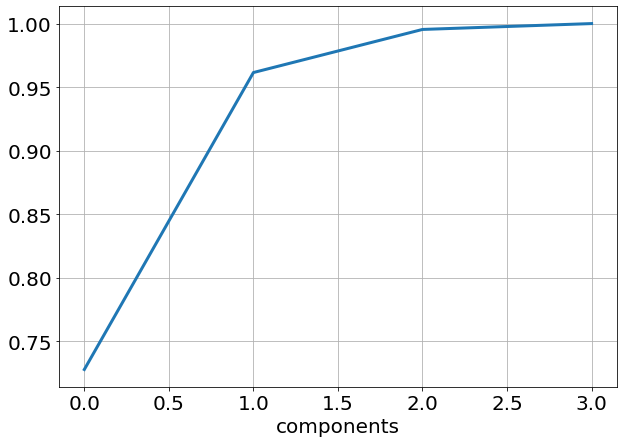

In [79]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X = StandardScaler().fit_transform(X)
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


pca = PCA().fit(X_train)

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)
plt.tick_params(labelsize=20)
plt.xlabel('components', fontsize=20)

Look's like 2 components is enough.

(120, 2)
(30, 2)


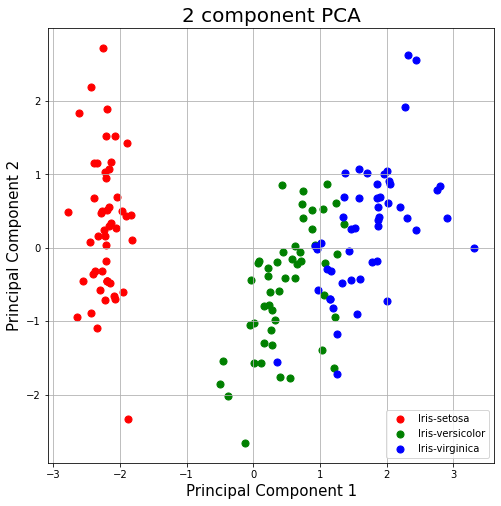

In [81]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_ = pd.concat([pca_df, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_['target'] == target
    ax.scatter(df_.loc[indicesToKeep, 'principal component 1']
               , df_.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape) 
print(X_test_pca.shape)

In [86]:

classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

y_pred = classifier.predict(X_test_pca)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('pca reduced data:  accuracy is',accuracy_score(y_pred,y_test))


classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('original data: accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.62      0.83      0.71         6

       accuracy                           0.87        30
      macro avg       0.84      0.87      0.85        30
   weighted avg       0.89      0.87      0.87        30

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
pca reduced data:  accuracy is 0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
original data: accuracy is 1.0


#### K Nearest Neighbors (k-NN) Classifier
Let's try a different classifier. The following is what we call a 'K Nearest Neighbors Classifier'. You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and [here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). 

In [88]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train_pca, y_train)

y_pred = classifier.predict(X_test_pca)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('pda reduced data: accuracy is',accuracy_score(y_pred,y_test))

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('original data: accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
pda reduced data: accuracy is 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
original data: accuracy is 1.0


### Support Vector Machine Classifier
The last one we will try is a support vector machine. You can learn more about it [here](https://scikit-learn.org/stable/modules/svm.html).

In [89]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train_pca, y_train)

y_pred = classifier.predict(X_test_pca)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('pca reduced data: accuracy is',accuracy_score(y_pred,y_test))

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('original data accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.67      1.00      0.80         6

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
pca reduced data: accuracy is 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
original data accuracy is 1.0


# Example 2: Eigenfaces

In [52]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

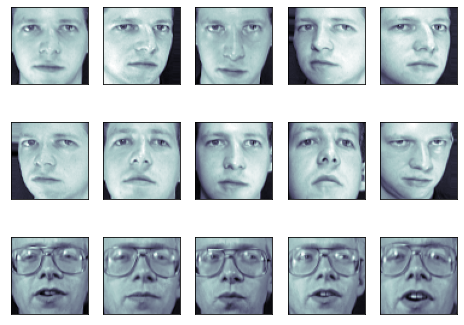

In [53]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

Note is that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial recognition, and is a process that can require a large collection of training data. This can be done in scikit-learn, but the challenge is gathering a sufficient amount of training data for the algorithm to work. Fortunately, this piece is common enough that it has been done. One good resource is [OpenCV](https://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html), the Open Computer Vision Library.

While we have not seen this method in class, we’ll perform a Support Vector classification of the images. We’ll do a typical train-test split on the images:

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


## Explained Variance
We can use PCA to reduce these features to a manageable size, while maintaining most of the information in the dataset. First, how many components should we pick?

We will use the explained variance. That is, the explained variance ratio which represents the variance explained using a particular eigenvector.

Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.


The total variance is the sum of variances of all individual principal components.

The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

### Example
Let’s suppose that our data set is 2-dimensional with 2 variables x,y and that the eigenvectors and eigenvalues of the covariance matrix are as follows:

Principal Component Analysis Example
If we rank the eigenvalues in descending order, we get λ1>λ2, which means that the eigenvector that corresponds to the first principal component (PC1) is v1 and the one that corresponds to the second component (PC2) isv2.

After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. If we apply this on the example above, we find that PC1 and PC2 carry respectively 96% and 4% of the variance of the data.


Text(0.5, 0, 'components')

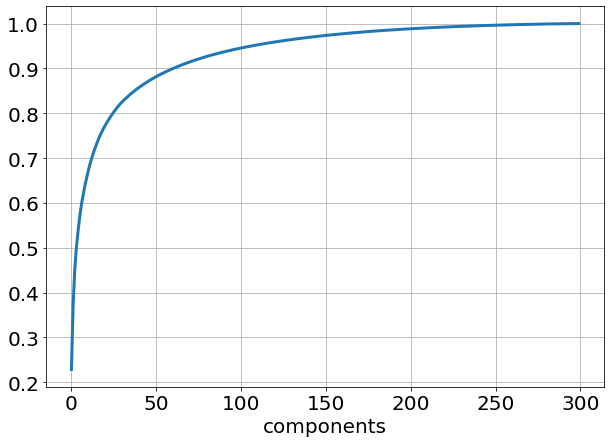

In [55]:
pca = PCA().fit(X_train)

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)
plt.tick_params(labelsize=20)
plt.xlabel('components', fontsize=20)



Let's check where the explained variance is above 95%

In [56]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)

(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
        210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
        249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
        262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
        275, 276, 277, 278, 279, 280, 281, 282, 283

Hence $k=105$ seems a reasonable choice for the number of components.

In [57]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=105, whiten=True)
pca.fit(X_train)

PCA(n_components=105, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:



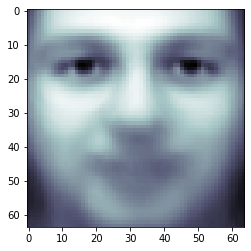

In [58]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [59]:
print(pca.components_.shape)

(105, 4096)


It is also interesting to visualize these principal components --- i.e. the eigenfaces. Let's look at the first 30.



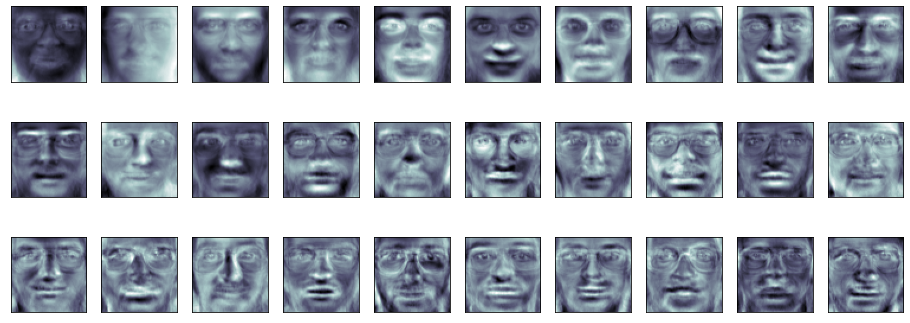

In [59]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:



In [60]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape) 
print(X_test_pca.shape)


(300, 105)
(100, 105)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face.



### Now we’ll perform support-vector-machine classification on this reduced dataset:



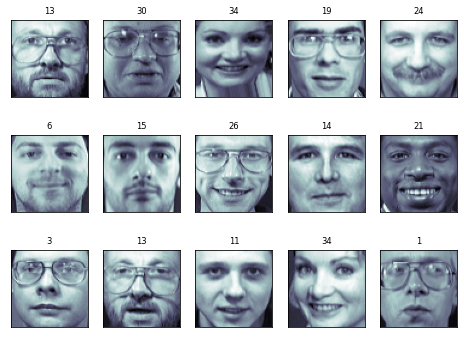

In [62]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

The classifier is correct on an impressive number of images given the simplicity of its learning model! Using a linear classifier on 150 features derived from the pixel-level data, the algorithm correctly identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures from `sklearn.metrics`. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [63]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      0.67      0.80         6
          19       1.00      1.00      1.00         4
          20       0.50    

In [64]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2 0 0 ... 0 0 1]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


### Pipelining with sklearn
scikit-learn provides pretty cool pipelining tools. So let's explore those. Above we used PCA as a pre-processing step before applying our support vector machine classifier. Plugging the output of one estimator directly into the input of a second estimator is a commonly used pattern; for this reason scikit-learn provides a Pipeline object which automates this process. The above problem can be re-expressed as a pipeline as follows:



In [46]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


/opt/homebrew/anaconda3/envs/envpy310/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Here we have used PCA “eigenfaces” as a pre-processing step for facial recognition. The reason we chose this is because PCA is a broadly-applicable technique, which can be useful for a wide array of data types. Research in the field of facial recognition in particular, however, has shown that other more specific feature extraction methods are can be much more effective.

